<a href="https://colab.research.google.com/github/JSJeong-me/OpenCV_Practitioner_Guide_2/blob/main/1-YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [1]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-11-16 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
img = cv2.imread('traffic-signal-1.jpg')[..., ::-1]

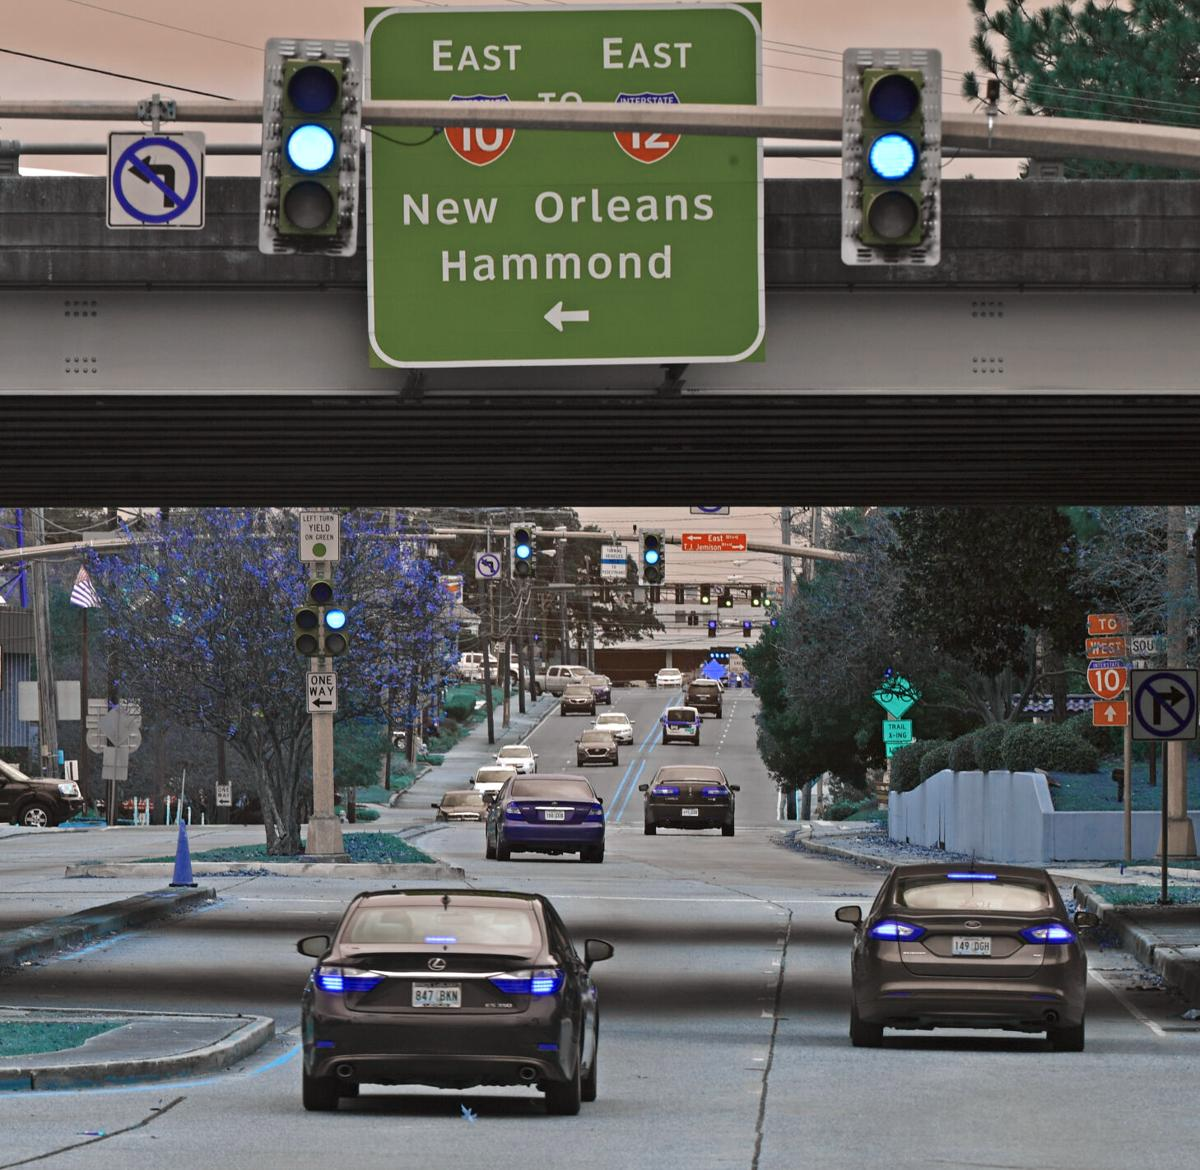

In [4]:
cv2_imshow(img)

In [5]:
model.classes =[9]

In [6]:
model.conf = 0.7

In [7]:
results = model(img, size = 720)

In [8]:
results.save()

Saved 1 image to runs/detect/exp6


In [9]:
crop_image = results.pandas().xyxy[0]

In [10]:
crop_image

,xmin,ymin,xmax,ymax,confidence,class,name
0,258.888489,40.094105,360.266296,255.937485,0.846680,9,traffic light
1,841.811035,52.922138,938.203064,264.870361,0.766602,9,traffic light


In [11]:
results.pandas().xyxy[0].sort_values('xmin')

,xmin,ymin,xmax,ymax,confidence,class,name
0,258.888489,40.094105,360.266296,255.937485,0.846680,9,traffic light
1,841.811035,52.922138,938.203064,264.870361,0.766602,9,traffic light


In [12]:
x1, y1, x2, y2 = int(crop_image.iloc[1, 0]), int(crop_image.iloc[1, 1]), int(crop_image.iloc[1, 2]), int(crop_image.iloc[1, 3])

In [13]:
signal = img[y1:y2, x1:x2]

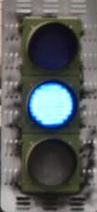

In [14]:
cv2_imshow(signal)

In [15]:
hsv_image = cv2.cvtColor(signal, cv2.COLOR_RGB2HSV)

In [16]:
# Red color
low_red = np.array([1, 220, 90]) # 161,155,84 
high_red = np.array([179, 255, 255])

In [17]:
# Blue color
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])

In [18]:
l_h, u_h = 0,202
l_s, u_s = 40, 227
l_v, u_v = 206, 255

l_yellow = np.array([l_h, l_s, l_v])
u_yellow = np.array([u_h, u_s, u_v])

In [19]:
red_mask = cv2.inRange(hsv_image, low_red, high_red)
red = cv2.bitwise_and(signal, signal, mask = red_mask)

In [20]:
blue_mask = cv2.inRange(hsv_image, low_blue, high_blue)
blue = cv2.bitwise_and(signal, signal, mask = blue_mask)

In [21]:
yellow_mask = cv2.inRange(hsv_image, l_yellow, u_yellow)
yellow = cv2.bitwise_and(signal, signal, mask = yellow_mask)

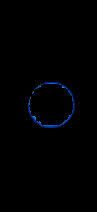

In [22]:
cv2_imshow(red)

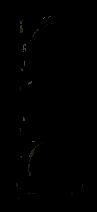

In [23]:
cv2_imshow(blue)

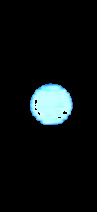

In [24]:
cv2_imshow(yellow)